In [364]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

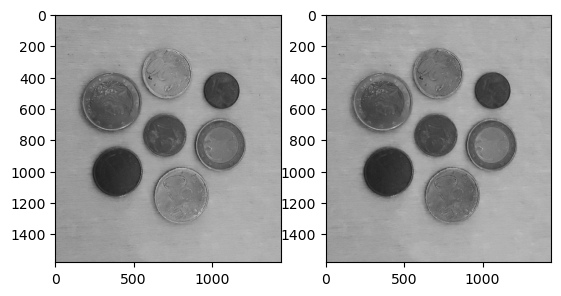

In [365]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(path + "monedas.jpg")
fig,axs = plt.subplots(1,2)
axs[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2GRAY),cmap="gray")
axs[1].imshow(img[:,:,0],cmap="gray")
img1=img[:,:,0]

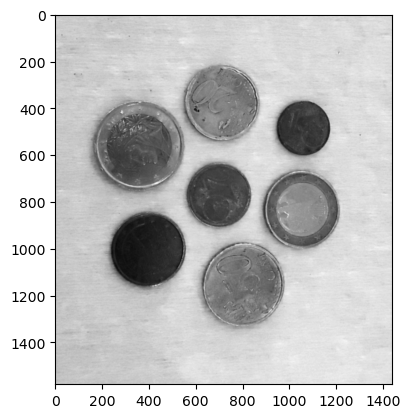

In [366]:
img1 = cv.GaussianBlur(src=img1, ksize=(5,5), sigmaX=20, sigmaY=20)
plt.imshow(img1,cmap="gray")

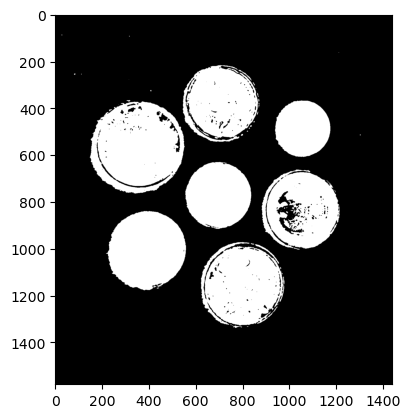

In [367]:
ret,th1 = cv.threshold(img1,127, 255,cv.THRESH_BINARY_INV)
plt.imshow(th1,cmap="gray")

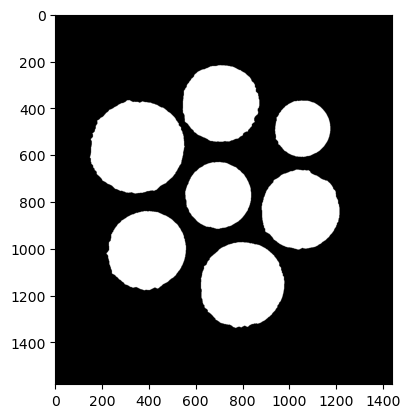

In [368]:

import numpy as np

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))


img2 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations=5)
img2 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(img2,cmap="gray")

# **BORDE**

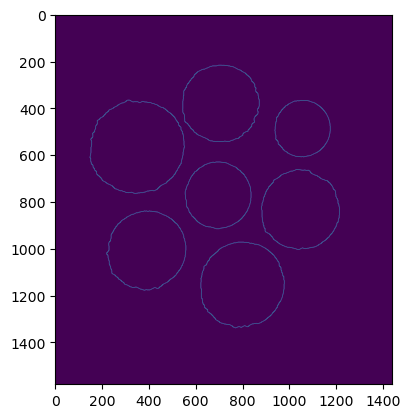

In [369]:
min=50
max=100
cn = cv.Canny(img2,min,max)
plt.imshow(cn)

# **CONTORNOS**

In [370]:
img_c = img.copy()
contornos,jerarquia = cv.findContours(cn,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))

7


Centro: X:798 Y:1154
Centro: X:390 Y:1007
Centro: X:1046 Y:835
Centro: X:695 Y:773
Centro: X:1055 Y:488
Centro: X:349 Y:567
Centro: X:706 Y:381


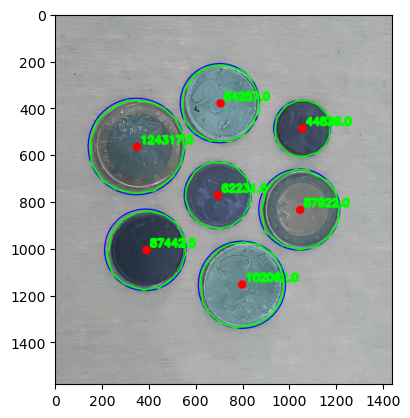

In [371]:
approx=[]

for contorno in contornos:
    M = cv.moments(contorno)
    if M['m00']:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print(f"Centro: X:{cx} Y:{cy}")

        # CENTRO CON TEXTO
        cv.circle(img_c, (cx, cy), 5, (255, 0, 0), 25)
        cv.putText(img_c, str(cv.contourArea(contorno)), (cx+15,cy-15),  cv.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0),12)
        
        # BORDE MÁS REDONDEADO SI NO SERÍA YA PONIENDO EL CONTORNO
        perimetro = cv.arcLength(contorno,True)
        approx.append(cv.approxPolyDP(contorno,0.005*perimetro,True))

        # RADIO REDONDEADO MÍNIMO
        (x,y),radius = cv.minEnclosingCircle(contorno)
        cv.circle(img_c, (int(x), int(y)), int(radius), (0,0,255), 3)

cv.drawContours(img_c,approx,-1,(0,255,0),5)
plt.imshow(img_c)